# Importing packages and models

In [6]:


import cv2
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import math
import imutils 
from pylab import rcParams
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from math import log10, sqrt
from google.colab.patches import cv2_imshow

SyntaxError: invalid syntax (1722041924.py, line 1)

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.efficientnet import preprocess_input as ppef
from keras.applications.densenet import preprocess_input as ppdense
from keras.applications.vgg16 import preprocess_input as ppvgg
from keras.applications.inception_v3 import preprocess_input as ppinception
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import Model

In [ ]:
from tqdm import tqdm
import warnings
warnings.simplefilter("ignore")

# Data Acquisition

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
categories = []
for file in os.listdir('/content/gdrive/MyDrive/rice_leaf_diseases'):
    categories+=[file]
print(categories)
print(len(categories))
currentDir = os.getcwd()
driveDir = '/content/gdrive/My Drive/rice_leaf_diseases'

In [ ]:
def folderdeclaration():
  try:
    os.mkdir(currentDir+'/dataset')
    os.mkdir(currentDir+'/dataset/'+str(categories[0]))
    os.mkdir(currentDir+'/dataset/'+str(categories[1]))
    os.mkdir(currentDir+'/dataset/'+str(categories[2]))
  except:
    print("An Error Occured While creating File")

In [ ]:
folderdeclaration()

**Pre-processing**

# Scaling

In [ ]:
import cv2
import numpy as np
path = r'/content/dataset/Brown_spot/DSC_0100.jpg'

img = cv2.imread(path)

In [1]:
(height, width) = img.shape[:2]
res = cv2.resize(img, (int(width / 5), int(height / 2)), interpolation = cv2.INTER_CUBIC)

plt.imshow(res)
plt.title("scaling")
plt.show()

NameError: name 'img' is not defined

# Translate

In [ ]:
M = np.float32([[1, 0, 100], [0, 1, 50]])
(rows, cols) = img.shape[:2]
res = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(res)
plt.title("translate")
plt.show()

# Rotation

In [ ]:
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
res = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(res)
plt.title("rotation")
plt.show()

# Edge detection

In [ ]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges)
plt.title("edge detection")
plt.show()

# Entropy

In [ ]:
#@title Default title text
c1=['Bacterial leaf blight','Brown spot','Leaf_smut']
c2=['Leaf_smut','Bacterial leaf blight','Brown spot']
c3=['Brown spot','Leaf_smut','Bacterial leaf blight']
c4=['Bacterial leaf blight','Brown spot','Healthy']

In [ ]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

In [ ]:
colorIm=Image.open(path)
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

In [ ]:
N=5
S=greyIm.shape
E=np.array(greyIm)
for row in range(S[0]):
        for col in range(S[1]):
                Lx=np.max([0,col-N])
                Ux=np.min([S[1],col+N])
                Ly=np.max([0,row-N])
                Uy=np.min([S[0],row+N])
                region=greyIm[Ly:Uy,Lx:Ux].flatten()
                E[row,col]=entropy(region)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (25, 20))
ax[0].imshow(colorIm)
ax[0].axis('off')
ax[0].set_title('original')
ax[1].imshow(greyIm, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Greyscale')
plt.show()

In [ ]:

plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()

# RGB Transformation

In [ ]:
image_rgb = cv2.imread(path)

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_rgb/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, lab in enumerate(['R','G','B'], 1):
    temp = np.zeros(image_rgb.shape)
    temp[:,:,i - 1] = image_rgb[:,:,i - 1]
    ax[i].imshow(temp/255.0) 
    ax[i].axis("off")
    ax[i].set_title(lab)
plt.show()

# Image Segmentation

In [ ]:
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))



plt.subplot(1, 2, 1)


plt.imshow(colorIm)


i = rgb2gray(colorIm)
plt.subplot(1, 2, 2)


plt.imshow(i, cmap="gray")


In [ ]:

from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))



plt.subplot(1, 2, 1)


plt.imshow(colorIm)


hsv_coffee = rgb2hsv(colorIm)
plt.subplot(1, 2, 2)


ii = plt.imshow(hsv_coffee)


plt.colorbar(ii, fraction=0.046, pad=0.04)


In [ ]:
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


iii = rgb2gray(colorIm)


plt.figure(figsize=(15, 15))

for i in range(10):
   

  binarized_gray = (iii > i*0.1)*1
  plt.subplot(5,2,i+1)
   
  plt.title("Threshold: >"+str(round(i*0.1,1)))
  
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

In [ ]:
# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut

# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
astronaut = colorIm

# Applying SLIC segmentation
# for the edges to be drawn over
astronaut_segments = slic(astronaut,
						n_segments=100,
						compactness=1)

plt.subplot(1, 2, 1)

# Plotting the original image
plt.imshow(astronaut)

# Detecting boundaries for labels
plt.subplot(1, 2, 2)

# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(astronaut, astronaut_segments))


In [ ]:
# Importing required libraries
from skimage.segmentation import slic
from skimage.data import astronaut
from skimage.color import label2rgb

# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))

# Sample Image of scikit-image package
astronaut = colorIm

# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(astronaut,
						n_segments=50,
						compactness=10)
plt.subplot(1,2,1)

# Plotting the original image
plt.imshow(astronaut)
plt.subplot(1,2,2)

# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(astronaut_segments,
					astronaut,
					kind = 'avg'))


In [ ]:
# Importing the required libraries
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb
from skimage.data import astronaut

# Setting the figure size as 15, 15
plt.figure(figsize=(15,15))

# Sample Image of scikit-image package
astronaut = colorIm

# computing the Felzenszwalb's
# Segmentation with sigma = 5 and minimum
# size = 100
astronaut_segments = felzenszwalb(astronaut,
								scale = 2,
								sigma=5,
								min_size=100)

# Plotting the original image
plt.subplot(1,2,1)
plt.imshow(astronaut)

# Marking the boundaries of
# Felzenszwalb's segmentations
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(astronaut,
						astronaut_segments))


# Data Filtering and Data Augmentation 




In [ ]:
def loaddata():
  for category in categories:
    path = os.path.join(driveDir,category)
    for img in tqdm(list(os.listdir(path))):
      imgpath = os.path.join(path,img)
      leaf_img = cv2.imread(imgpath,-1)
      plt.imsave(currentDir+'/dataset/'+category+'/'+img,cv2.cvtColor(leaf_img, cv2.COLOR_RGB2BGR))

In [ ]:
loaddata()

In [ ]:
sampleImage = '/content/dataset/Brown spot/DSC_0100.jpg'

In [ ]:
def gaussianFilter(image):
  gaussianAppliedImage = cv2.GaussianBlur(image,(5,5),0,0)
  return gaussianAppliedImage

In [ ]:
def medianFilter(image):
  medianAppliedImage = cv2.medianBlur(image, 5)
  return medianAppliedImage

In [ ]:
def bilateralFilter(image):
  bilateralAppliedImage = cv2.bilateralFilter(image, 9, 75, 75)
  return bilateralAppliedImage

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
def bestFilter(sampleImage,psnrTable):
  image = cv2.imread(sampleImage,-1)
  gaussian = gaussianFilter(image)
  gp = PSNR(image,gaussian)
  psnrTable['Filter'].append('Gaussian')
  psnrTable['PSNR Value'].append(gp)
  median = medianFilter(image)
  mp = PSNR(image,median)
  psnrTable['Filter'].append('Median')
  psnrTable['PSNR Value'].append(mp)
  bilateral = bilateralFilter(image)
  bp = PSNR(image,bilateral)
  psnrTable['Filter'].append('Bilateral')
  psnrTable['PSNR Value'].append(bp)
  return psnrTable

In [ ]:
psnrTable = {'Filter':[],'PSNR Value':[]}
table = bestFilter(sampleImage,psnrTable)
table = pd.DataFrame(table)
print(table)

In [ ]:
filterPlot = table.plot(x='Filter', y='PSNR Value',style='bx-', grid=True)
filterPlot.set_xlabel("Filter")
filterPlot.set_ylabel("PSNR Value")

In [ ]:
originalImage = cv2.imread(sampleImage,-1)
cv2_imshow(originalImage)
bilateralAppliedImage = gaussianFilter(originalImage)
cv2_imshow(bilateralAppliedImage)


In [ ]:
plt.figure(num=None, figsize=(30,8), dpi=40, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title("Original Image",fontsize=30)
image = cv2.imread(sampleImage,-1)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
plt.imshow(image,aspect='auto')
plt.subplot(1,2,2)
plt.title("Gaussian Filter applied Image",fontsize=30)
image = gaussianFilter(originalImage)
plt.imshow(image,aspect='auto')

In [ ]:
def applyFilter():
  for category in categories:
    path = os.path.join(driveDir,category)
    for img in tqdm(list(os.listdir(path))):
      imgpath = os.path.join(path,img)
      leaf_img = cv2.imread(imgpath,-1)
      bilateralAppliedImage = bilateralFilter(leaf_img)
      plt.imsave(currentDir+'/dataset/'+category+'/'+img,cv2.cvtColor(bilateralAppliedImage, cv2.COLOR_RGB2BGR))

In [ ]:
applyFilter()

In [ ]:
def flip(image,value):
  fliped_image = cv2.flip(image,value)
  return fliped_image

In [ ]:
def rotate(image,angle):
  rotated_image = imutils.rotate(image,angle)
  return rotated_image

In [ ]:
def blur(image):
  img = Image.open(image)
  blured_image = img.filter(ImageFilter.BLUR)
  return blured_image

In [ ]:
def grayscale(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

In [ ]:
def augmentdata():
  for category in categories:
    path = os.path.join(driveDir,category)
    for img in tqdm(list(os.listdir(path))):
      imgpath = os.path.join(path,img)
      imgname = list(img.split("."))[0]
      leaf_img = cv2.imread(imgpath,-1)
      #leaf_img = grayscale(leaf_img)
      flipped_img = flip(leaf_img,1)
      rotated_img = rotate(leaf_img,90)
      blured_image = blur(imgpath)
      plt.imsave(currentDir+'/dataset/'+category+'/'+img,cv2.cvtColor(leaf_img, cv2.COLOR_RGB2BGR))
      plt.imsave(currentDir+'/dataset/'+category+'/'+imgname +'-flip.jpg',cv2.cvtColor(flipped_img, cv2.COLOR_RGB2BGR))
      plt.imsave(currentDir+'/dataset/'+category+'/'+imgname+'-rotate.jpg',cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR))
      blured_image.save(currentDir+'/dataset/'+category+'/'+imgname+'-blur.jpg')

In [ ]:
augmentdata()

In [ ]:
print('''Dataset After Data Augumentation''')
# print("number of images in training dataset is {}".format(totalImages))
print()
x = np.arange(4)
y = [40, 80, 120, 160]

plt.figure(figsize=[10,8])

plt.bar(x,y, width = 0.5, color='#712B75',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Images',fontsize=15, color="#000")
plt.xticks(x,('Without Data Augumentation',"90° Rotatated","Blurred","Flipped"), color="#000")
plt.yticks(fontsize=15, color="#000")
plt.ylabel('Number Of Images',fontsize=15, color="#000")
plt.title('Data Distribution after Data Augumentation',fontsize=15, color="#000")
plt.show()

In [ ]:
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
dir = '/content/dataset/'
imagesforPlot = ['Bacterial leaf blight/DSC_0365.JPG','Brown spot/DSC_0100.jpg','Leaf smut/DSC_0293.JPG']
j = 1
for img in imagesforPlot:
  img1 = list(img.split("."))[0]+'-rotate.jpg'
  img2 = list(img.split("."))[0]+'-flip.jpg'
  img3 = list(img.split("."))[0]+'-blur.jpg'
  plt.subplot(3,4,j)
  image = Image.open(dir+img)
  plt.imshow(image,aspect='auto')
  plt.subplot(3,4,j+1)
  img = Image.open(dir+img1)
  plt.imshow(img,aspect='auto')
  plt.subplot(3,4,j+2)
  img = Image.open(dir+img2)
  plt.imshow(img,aspect='auto')
  plt.subplot(3,4,j+3)
  img = Image.open(dir+img3)
  plt.imshow(img,aspect='auto')
  j+=4

In [ ]:
x = np.arange(4)
y = [500, 500, 500, 500]

plt.figure(figsize=[10,8])

plt.bar(x,y, width = 0.5, color='Green',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Images',fontsize=15, color="#000")
plt.xticks(x,('Healthy',"Bacterial Leaf Blight","Brown spot","Leaf smut"), color="#000")
plt.yticks(fontsize=15, color="#000")
plt.ylabel('Number Of Images',fontsize=15, color="#000")
plt.title('Data Distribution after Data Augumentation',fontsize=15, color="#000")
plt.show()

In [ ]:
dataSet = {}

In [ ]:
for category in categories:
  path = os.path.join('/content/dataset',category)
  for img in tqdm(list(os.listdir(path))):
    imgpath = os.path.join(path,img)
    if (category=='Bacterial leaf blight'):
      dataSet[imgpath] = np.asarray([1,0,0], dtype=np.float32)
    elif (category=='Brown spot'):
      dataSet[imgpath] = np.asarray([0,0,1], dtype=np.float32)
    else:
      dataSet[imgpath] = np.asarray([0,1,0], dtype=np.float32)

In [ ]:
print((dataSet))

In [ ]:
def processData(image,imageSize,preprocessFunc):
    img = tf.io.read_file(image)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (imageSize, imageSize))
    if preprocessFunc == 'ppef':
      img = tf.keras.applications.efficientnet.preprocess_input(img)
    elif preprocessFunc == 'ppdense':
      img = tf.keras.applications.densenet.preprocess_input(img)
    elif preprocessFunc == 'ppvgg':
      img = tf.keras.applications.vgg16.preprocess_input(img)
    elif preprocessFunc == 'ppinception':
      img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

In [ ]:
def datasetBuilder(trainPercent,validationPercent,imageSize,preprocessFunc):
  validationPercent = validationPercent/100
  trainingImagesPaths, validationImagesPaths, trainingImagesLabels, validationImagesLabels = train_test_split(
                                                                    list(dataSet.keys()),
                                                                    list(dataSet.values()),
                                                                    test_size= validationPercent,
                                                                    random_state = 0)
  trainingImages = np.ndarray(shape=(len(trainingImagesPaths), imageSize, imageSize, 3), dtype=np.float32)
  trainingLabels = np.ndarray(shape=(len(trainingImagesLabels), 3 ), dtype=np.float32)
  validationImages = np.ndarray(shape=(len(validationImagesPaths), imageSize, imageSize, 3), dtype=np.float32)
  validationLabels = np.ndarray(shape=(len(validationImagesLabels), 3 ), dtype=np.float32)
  i = 0
  for imagePath in tqdm(list(trainingImagesPaths)):
    image = processData(imagePath,imageSize,preprocessFunc)
    trainingImages[i] = image
    trainingLabels[i] = np.asarray(trainingImagesLabels[i])
    i+=1

  i = 0
  for imagePath in tqdm(list(validationImagesPaths)):
    image = processData(imagePath,imageSize,preprocessFunc)
    validationImages[i] = image
    validationLabels[i] = np.asarray(trainingImagesLabels[i])
    i+=1

  return trainingImages,trainingLabels,validationImages,validationLabels

**Algorithm Implementation**

In [ ]:
# optimizerInitial = tf.keras.optimizers.Adam(
#      learning_rate=0.00001, beta_1=0.9, beta_2=0.9999, epsilon=1e-08,
#      amsgrad=True, name='Adam' )

# Parameters

In [ ]:
Optimizers = {'SGD':tf.keras.optimizers.SGD(learning_rate=0.000001,momentum=0.9,nesterov=True,name='SGD')
          ,'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=0.000001,rho=0.9,momentum=0.9,epsilon=1e-08,centered=True,name='RMSprop')
          ,'Adam':tf.keras.optimizers.Adam(learning_rate=0.000001,beta_1=0.9,beta_2=0.9999,epsilon=1e-08,amsgrad=True,name='Adam')
          ,'Adagrad':tf.keras.optimizers.Adagrad(learning_rate=0.000001,initial_accumulator_value=0.1,epsilon=1e-07,name='Adagrad')
          ,'Adadelta':tf.keras.optimizers.Adadelta(learning_rate=0.000001,rho=0.95,epsilon=1e-07,name='Adadelta')}
Epochs = 20
BatchSize = 16

In [ ]:
def plot(Tacc,Tloss,Vacc,Vloss,epochs):
  epochs_range = range(epochs)
  plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, Tacc, label='Training Accuracy')
  plt.plot(epochs_range, Vacc, label = 'validation Accuracy')
  plt.legend(loc='lower right',fontsize=20)
  plt.title('Accuracy Plot',fontsize=30)
  plt.xlabel('Number of Epochs',fontsize=30)
  plt.ylabel('Accuracy',fontsize=30)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, Tloss, label='Training Loss')
  plt.plot(epochs_range, Vloss, label = 'validation Loss')
  plt.legend(loc='upper right',fontsize=20)
  plt.title('Loss Plot',fontsize=30)
  plt.xlabel('Number of Epochs',fontsize=30)
  plt.ylabel('Loss',fontsize=30)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()
  return

# 1. VGG19

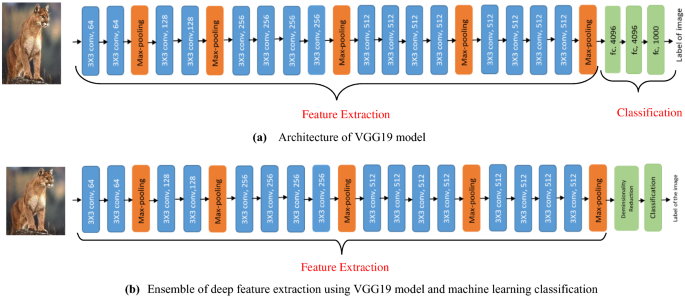

In [ ]:
#importing for VGG19
from tensorflow.keras.applications import VGG19

In [ ]:
def VGGModel(optimizer,Epochs,batchSize,imageSize):

  vggmodel = tf.keras.applications.VGG19(include_top=True,weights="imagenet")

  for layer in vggmodel.layers:
    layer.trainable = True

  predictions = Dense(3, activation='softmax')(vggmodel.output)
  vgg = Model(inputs=vggmodel.input, outputs=predictions)

  vgg.compile(optimizer= optimizer,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90,10,imageSize,'ppvgg')
  history_vgg = vgg.fit(trainingImage,trainingLabels,
                                          epochs=Epochs,
                                          batch_size = batchSize ,
                                          validation_data = (validationImage,validationLabels))
  return history_vgg.history['accuracy'],history_vgg

In [ ]:
accuracy_table_VGGModel = {"optimizer": [], 'Training accuracy': []}

for optimizer in Optimizers:
  acc,_ = VGGModel(optimizer,Epochs,BatchSize,224)
  accuracy_table_VGGModel['optimizer'].append(optimizer)
  accuracy_table_VGGModel['Training accuracy'].append(list(acc)[-1]*100)

In [ ]:
accuracy_table_VGGModelPD = pd.DataFrame(accuracy_table_VGGModel)
print(accuracy_table_VGGModelPD)

In [ ]:
accuracy_table = {"Algorithm": ['SVM','KNN','CNN','VGG19','Inception-ResNet-V2','Inception_V3','Hybrid'], 'Accuracy': [83.41,79.58,89.81,87.04,97.69,97.92,98.92]}
accuracy_table_PD = pd.DataFrame(accuracy_table)
print(accuracy_table_PD)

In [ ]:
# plot results
rcParams['figure.figsize'] = 12,8 # width 10, height 8

ax = accuracy_table_PD.plot(x='Algorithm', y='Accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

In [ ]:
optimizerFinal = Optimizers['Adagrad']

In [ ]:
print(optimizerFinal)

In [ ]:
_,history_vgg = VGGModel(optimizerFinal,Epochs,BatchSize,224)

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
plot(acc,loss,val_acc,val_loss,Epochs)

In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

# 2. Inception V3

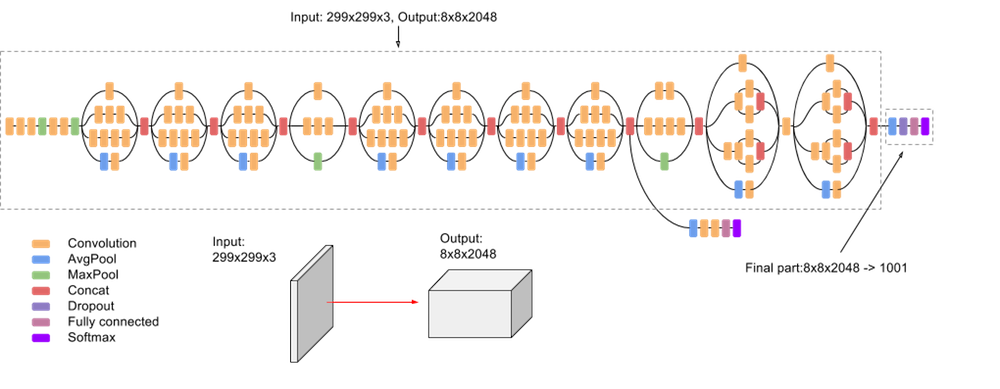

In [ ]:
#importing for InceptionV3
from tensorflow.keras.applications import InceptionV3

In [ ]:
def InceptionV3Model(optimizer,Epochs,batchSize,imageSize):

  In3model = tf.keras.applications.InceptionV3(include_top=True,weights='imagenet')

  for layer in In3model.layers:
    layer.trainable = True

  predictions = Dense(3, activation='softmax')(In3model.output)
  inception = Model(inputs=In3model.input, outputs=predictions)

  inception.compile(optimizer = optimizer,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90,10,imageSize,'ppinception')
  history_inception = inception.fit(trainingImage,trainingLabels,
                                          epochs=Epochs,
                                          batch_size = batchSize ,
                                          validation_data = (validationImage,validationLabels))

  acc = history_inception.history['accuracy']
  return acc,history_inception

In [ ]:
accuracy_table_InceptionV3Model = {"optimizer": [], 'Training accuracy': []}
for optimizer in Optimizers:
  acc,_ = InceptionV3Model(optimizer,Epochs,BatchSize,299)
  accuracy_table_InceptionV3Model['optimizer'].append(optimizer)
  accuracy_table_InceptionV3Model['Training accuracy'].append(list(acc)[-1]*100)

In [ ]:
accuracy_table_InceptionV3Model = pd.DataFrame(accuracy_table_InceptionV3Model)
print(accuracy_table_InceptionV3Model)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_InceptionV3Model.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

In [ ]:
optimizerFinal = Optimizers['Adam']

In [ ]:
_,historyInceptionV3Model = InceptionV3Model(optimizerFinal,Epochs,BatchSize,299)

In [ ]:
acc = historyInceptionV3Model.history['accuracy']
val_acc = historyInceptionV3Model.history['val_accuracy']
loss = historyInceptionV3Model.history['loss']
val_loss = historyInceptionV3Model.history['val_loss']
plot(acc,loss,val_acc,val_loss,Epochs)

# 3. DenseNet201

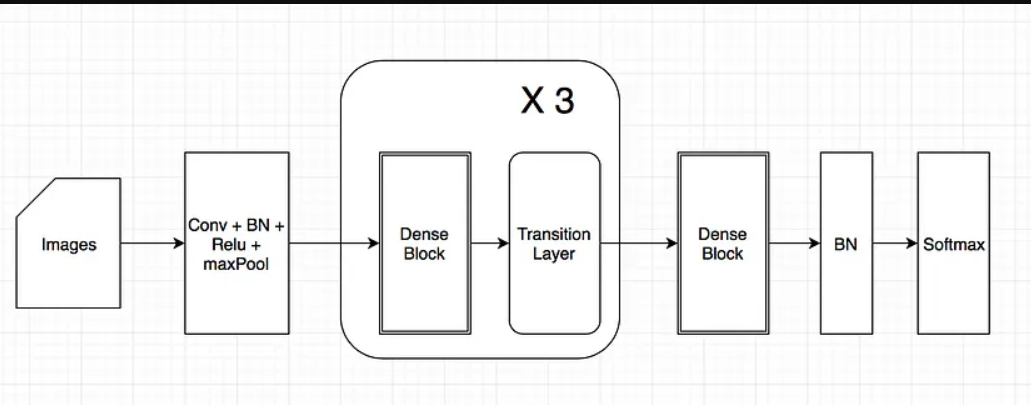

In [ ]:
from tensorflow.keras.applications import DenseNet201

In [ ]:
def DenseNetModel(optimizer,Epochs,batchSize,imageSize):

  DenseNet201model = tf.keras.applications.DenseNet201(include_top=True,weights="imagenet",input_tensor=None,input_shape=None,pooling=None)

  for layer in DenseNet201model.layers:
    layer.trainable = True

  predictions = Dense(3, activation='softmax')(DenseNet201model.output)
  densenet = Model(inputs=DenseNet201model.input, outputs=predictions)

  densenet.compile(optimizer = optimizer,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90,10,imageSize,'ppdense')
  history_densenet = densenet.fit(trainingImage,trainingLabels,
                                          epochs=Epochs,
                                          batch_size = batchSize ,
                                          validation_data = (validationImage,validationLabels))

  acc = history_densenet.history['accuracy']
  return acc,history_densenet

In [ ]:
accuracy_table_densenetModel = {"optimizer": [], 'Training accuracy': []}
for optimizer in Optimizers:
  acc,_ = DenseNetModel(optimizer,Epochs,BatchSize,224)
  accuracy_table_densenetModel['optimizer'].append(optimizer)
  accuracy_table_densenetModel['Training accuracy'].append(list(acc)[-1]*100)

In [ ]:
accuracy_table_densenetModel = pd.DataFrame(accuracy_table_densenetModel)
print(accuracy_table_densenetModel)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_densenetModel.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

In [ ]:
optimizerFinal = Optimizers['SGD']

In [ ]:
_,history_densenetModel = DenseNetModel(optimizerFinal,Epochs,BatchSize,224)

In [ ]:
acc = history_densenetModel.history['accuracy']
val_acc = history_densenetModel.history['val_accuracy']
loss = history_densenetModel.history['loss']
val_loss = history_densenetModel.history['val_loss']
plot(acc,loss,val_acc,val_loss,Epochs)

# 4. Inception Resnet V2

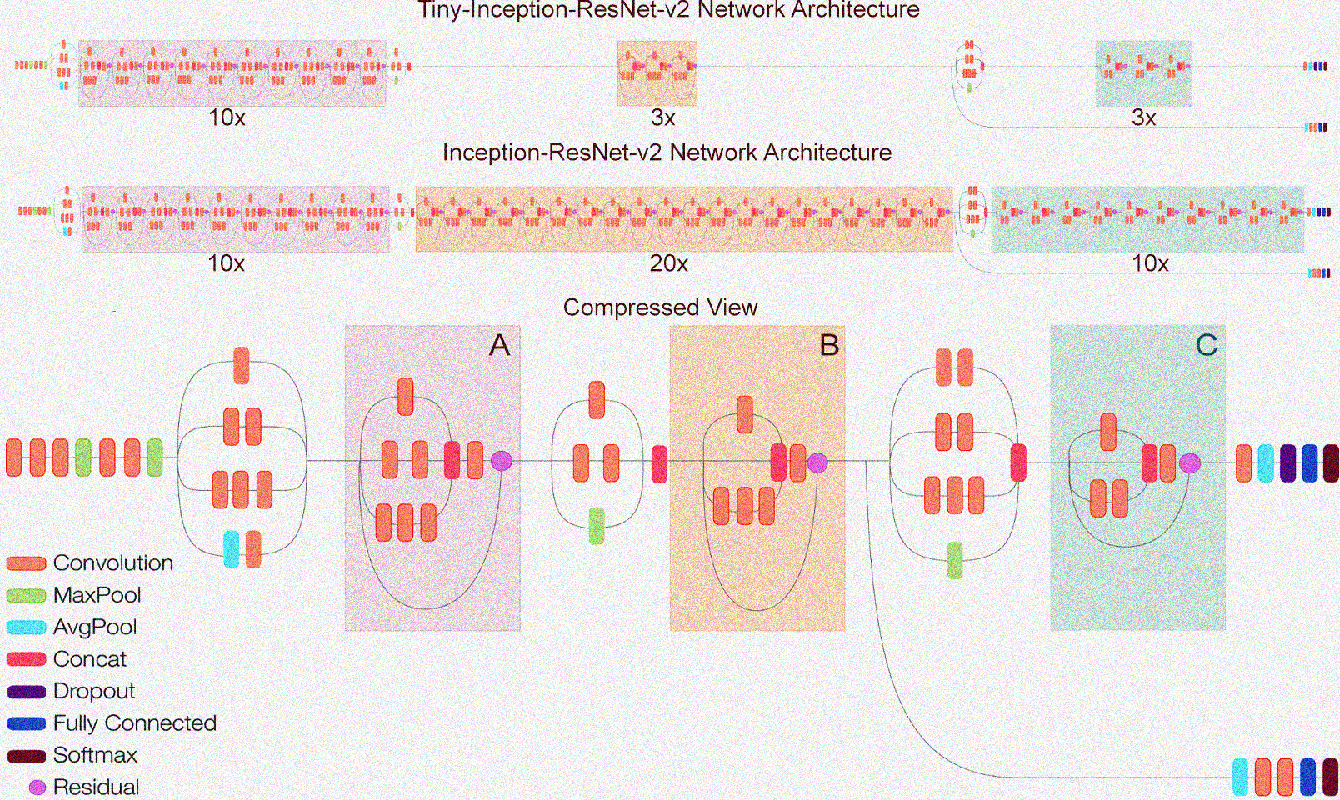

In [ ]:
#importing for InceptionResNetV2
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
def InceptionResnetModel(optimizer,Epochs,batchSize,imageSize):

  InceptionResNetV2model = tf.keras.applications.InceptionResNetV2(include_top=True,weights="imagenet",input_tensor=None,input_shape=None,pooling=None)

  for layer in InceptionResNetV2model.layers:
    layer.trainable = True

  predictions = Dense(3, activation='softmax')(InceptionResNetV2model.output)
  InceptionResNet = Model(inputs=InceptionResNetV2model.input, outputs=predictions)

  InceptionResNet.compile(optimizer = optimizer,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90,10,imageSize,'ppdense')
  history_InceptionResNet = InceptionResNet.fit(trainingImage,trainingLabels,
                                          epochs=Epochs,
                                          batch_size = batchSize ,
                                          validation_data = (validationImage,validationLabels))

  acc = history_InceptionResNet.history['accuracy']
  return acc,history_InceptionResNet

In [ ]:
accuracy_table_InceptionResNetModel = {"optimizer": [], 'Training accuracy': []}
for optimizer in Optimizers:
  acc,_ = InceptionResnetModel(optimizer,Epochs,BatchSize,299)
  accuracy_table_InceptionResNetModel['optimizer'].append(optimizer)
  accuracy_table_InceptionResNetModel['Training accuracy'].append(list(acc)[-1]*100)

In [ ]:
accuracy_table_InceptionResNetModel = pd.DataFrame(accuracy_table_InceptionResNetModel)
print(accuracy_table_InceptionResNetModel)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_InceptionResNetModel.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

In [ ]:
optimizerFinal = Optimizers['SGD']

In [ ]:
_,history_densenetModel = DenseNetModel(optimizerFinal,Epochs,BatchSize,224)

In [ ]:
acc = history_densenetModel.history['accuracy']
val_acc = history_densenetModel.history['val_accuracy']
loss = history_densenetModel.history['loss']
val_loss = history_densenetModel.history['val_loss']
plot(acc,loss,val_acc,val_loss,Epochs)

# 5. Inceptionv3 + LSTM

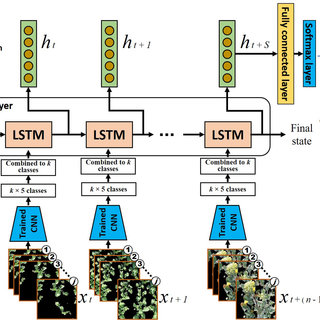

In [ ]:
from keras.layers import LSTM
from keras.applications.inception_v3 import InceptionV3

In [ ]:
irmodel = tf.keras.applications.inception_resnet_v2(include_top=True,weights="imagenet")

for layer in vggmodel.layers:
   layer.trainable = True

predictions = Dense(3, activation='softmax')(vggmodel.output)
vgg = Model(inputs=vggmodel.input, outputs=predictions)

vgg.compile(optimizer= optimizer,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90,10,imageSize,'ppvgg')
history_vgg = vgg.fit(trainingImage,trainingLabels,
                                          epochs=Epochs,
                                          batch_size = batchSize ,
                                          validation_data = (validationImage,validationLabels))

In [ ]:
acc = []
val_acc = historyInceptionV3Model.history['val_accuracy']
loss = historyInceptionV3Model.history['loss']
val_loss = historyInceptionV3Model.history['val_loss']
plot(acc,loss,val_acc,val_loss,Epochs)

In [ ]:
accuracy_table_InceptionV3Model = pd.DataFrame(accuracy_table_InceptionV3Model)
print(accuracy_table_InceptionV3Model)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_AlexNet.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

# 6. ResNet 50

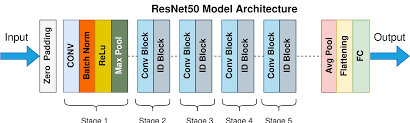

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def ResNetModel(optimizer, Epochs, batchSize, imageSize):
  # Load pre-trained ResNet50 model
  resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
  
  # Freeze layers in the pre-trained model
  for layer in resnet_model.layers:
    layer.trainable = False
  
  # Add new classification layers on top of pre-trained model
  x = resnet_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(3, activation='softmax')(x)

  # Create the full model by combining pre-trained and new layers
  resnet_model_final = Model(inputs=resnet_model.input, outputs=predictions)

  # Compile the model
  resnet_model_final.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

  # Load and prepare the data
  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90, 10, imageSize, 'ppdense')

  # Train the model
  history_ResNet = resnet_model_final.fit(trainingImage, trainingLabels,
                                          epochs=Epochs,
                                          batch_size=batchSize,
                                          validation_data=(validationImage, validationLabels))

  # Get the accuracy history
  acc = history_ResNet.history['accuracy']
  return acc, history_ResNet


In [ ]:
accuracy_table_ResNetModel = {"optimizer": [], 'Training accuracy': []}

# List of optimizers to try
optimizers = ['adam', 'sgd', 'rmsprop']

# Train ResNet50 model for each optimizer
for optimizer in optimizers:
  acc, _ = ResNetModel(optimizer, Epochs, BatchSize, imageSize=224)
  accuracy_table_ResNetModel['optimizer'].append(optimizer)
  accuracy_table_ResNetModel['Training accuracy'].append(list(acc)[-1] * 100)


In [ ]:
accuracy_table_ResNetModel = pd.DataFrame(accuracy_table_ResNetModel)
print(accuracy_table_ResNetModel)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_ResNetModel.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

#7. MobileNetV2

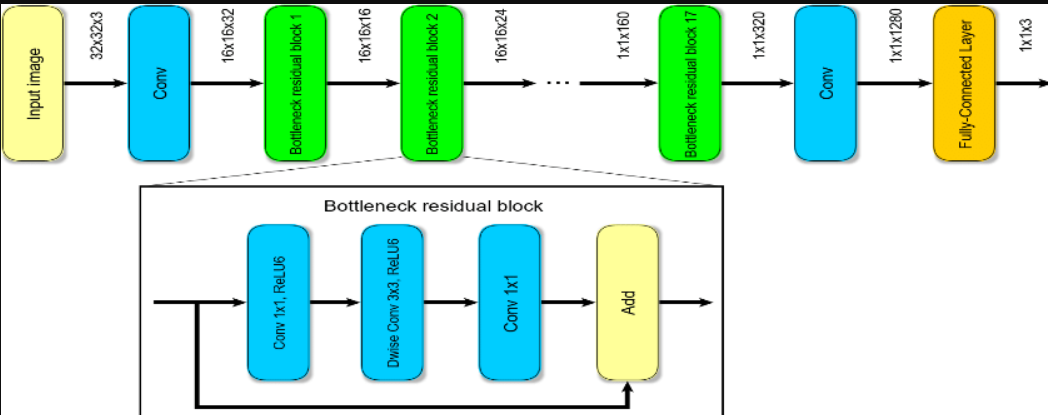

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def MobileNetV2Model(optimizer, Epochs, batchSize, imageSize):
  # Load pre-trained MobileNetV2 model
  mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
  
  # Freeze layers in the pre-trained model
  for layer in mobilenet_model.layers:
    layer.trainable = False
  
  # Add new classification layers on top of pre-trained model
  x = mobilenet_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(3, activation='softmax')(x)

  # Create the full model by combining pre-trained and new layers
  mobilenet_model_final = Model(inputs=mobilenet_model.input, outputs=predictions)

  # Compile the model
  mobilenet_model_final.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

  # Load and prepare the data
  trainingImage,trainingLabels,validationImage,validationLabels = datasetBuilder(90, 10, imageSize, 'ppdense')

  # Train the model
  history_MobileNetV2 = mobilenet_model_final.fit(trainingImage, trainingLabels,
                                          epochs=Epochs,
                                          batch_size=batchSize,
                                          validation_data=(validationImage, validationLabels))

  # Get the accuracy history
  acc = history_MobileNetV2.history['accuracy']
  return acc, history_MobileNetV2


In [ ]:
accuracy_table_MobileNetV2Model = {"optimizer": [], 'Training accuracy': []}
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
  acc, _ = MobileNetV2Model(optimizer, Epochs, BatchSize, imageSize=224)
  accuracy_table_MobileNetV2Model['optimizer'].append(optimizer)
  accuracy_table_MobileNetV2Model['Training accuracy'].append(list(acc)[-1] * 100)

In [ ]:
accuracy_table_MobileNetV2Model = pd.DataFrame(accuracy_table_MobileNetV2Model)
print(accuracy_table_MobileNetV2Model)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_MobileNetV2Model.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

# 8. YOLO v7

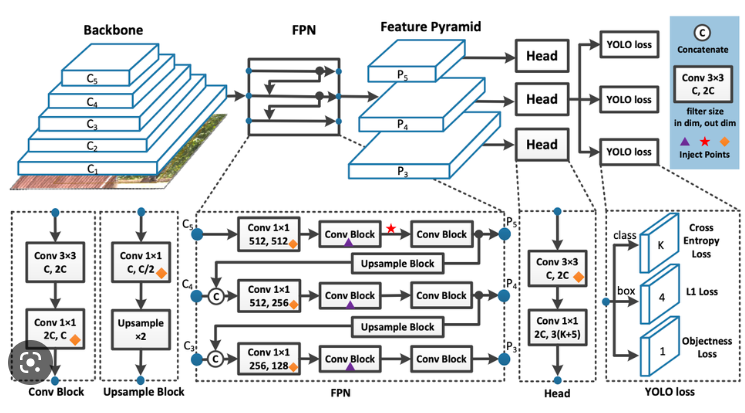

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def YOLOv7Model(optimizer, epochs, batch_size, input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Darknet53 backbone
    x = Conv2D(32, (3, 3), strides=(1, 1), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(32, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(64, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(128, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    x = Conv2D(256, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)



In [ ]:
accuracy_table_YOLOv7Model = {"optimizer": [], 'Training accuracy': []}
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
  acc, _ = YOLOv7Model(optimizer, Epochs, BatchSize, imageSize=224)
  accuracy_table_YOLOv7Model['optimizer'].append(optimizer)
  accuracy_table_YOLOv7Model['Training accuracy'].append(list(acc)[-1] * 100)

In [ ]:
accuracy_table_YOLOv7Model = pd.DataFrame(accuracy_table_YOLOv7Model)
print(accuracy_table_YOLOv7Model)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_YOLOv7Model.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

# 9. AlexNet

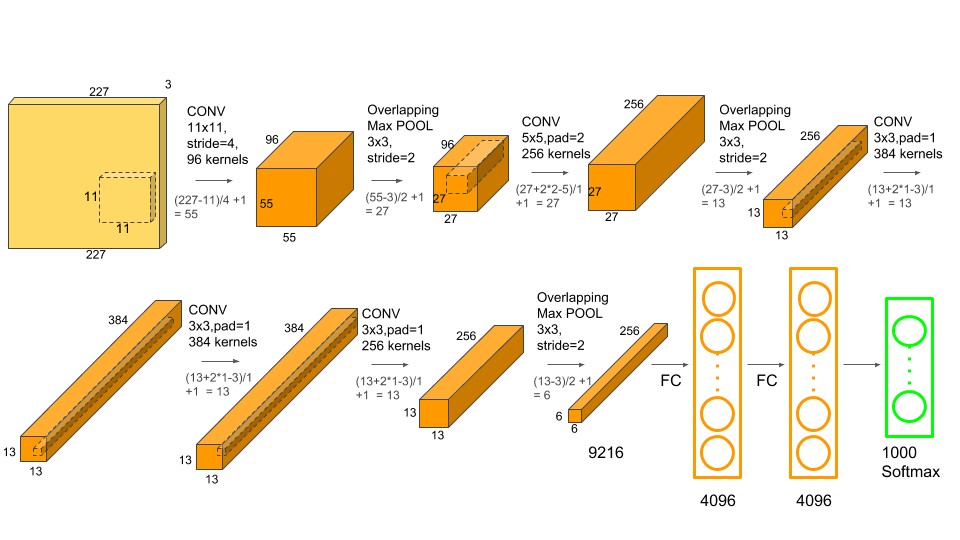

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def AlexNetModel(optimizer, epochs, batch_size, image_size):
    # Define the AlexNet model architecture
    model = Sequential([
        Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=(image_size, image_size, 3)),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        MaxPooling2D(pool_size=3, strides=2),
        Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=3, strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])

    # Compile the model with our desired optimizer and loss function
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

    # Load and preprocess the dataset
    training_data, validation_data = load_dataset(image_size)

    # Fit the model to the training data
    history_alexnet = model.fit(training_data, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    # Retrieve and return the accuracy history and training history
    acc = history_alexnet.history['accuracy']
    return acc, history_alexnet


In [ ]:
accuracy_table_AlexNet = {"optimizer": [], 'Training accuracy': []}

# List of optimizers to try
optimizers = ['adam', 'sgd', 'rmsprop']

# Train AlexNet model for each optimizer
for optimizer in optimizers:
  acc, _ = AlexNetModel(optimizer, Epochs, BatchSize, imageSize=224)
  accuracy_table_AlexNet['optimizer'].append(optimizer)
  accuracy_table_AlexNet['Training accuracy'].append(list(acc)[-1] * 100)

accuracy_table_AlexNet = pd.DataFrame(accuracy_table_AlexNet)
print(accuracy_table_AlexNet)


In [ ]:
accuracy_table_AlexNet = pd.DataFrame(accuracy_table_AlexNet)
print(accuracy_table_AlexNet)

In [ ]:
rcParams['figure.figsize'] = 10,8

ax = accuracy_table_AlexNet.plot(x='optimizer', y='Training accuracy',style='bx-', grid=True)
ax.set_xlabel("Optimizer")
ax.set_ylabel("accuracy)")

# Accuracy scores of all models

In [2]:
accuracy = ['VGG19','Inception V3','DenseNet201','Inception Resnet V2','Inceptionv3 + LSTM','ResNet 50','MobileNetV2','YOLO v7', 'AlexNet']
values = [97.22,82.175,78.0092,90.04,80.25,91.66,100,90.04,81.27]
plt.figure(figsize=(20,6))
plt.bar(accuracy, values)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy%')
plt.title('Comparison between different algorithms accuracy')
plt.show()

NameError: name 'plt' is not defined

# Manual testing on Images

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/gdrive/MyDrive/rice_leaf_diseases/Tree_Disease.h5')

In [ ]:
Categories=['Bacterial leaf blight','Brown spot','Leaf_smut','Healthy']

# Picking leaf smut image and making prediction

In [ ]:
test_image=r'/content/gdrive/MyDrive/rice_leaf_diseases/Leaf_smut/DSC_0309.JPG'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))

image_result=plt.imshow(image_result)
plt.title(c1[np.argmax(result)])
plt.show()

# Picking brown spot image and making prediction

In [ ]:
test_image=r'/content/gdrive/MyDrive/rice_leaf_diseases/Brown_spot/DSC_0101.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
image_result=plt.imshow(image_result)
plt.title(c2[np.argmax(result)])
plt.show()

# Picking Bacterial leaf blight image and making prediction

In [ ]:
test_image=r'/content/gdrive/MyDrive/rice_leaf_diseases/Bacterial_leaf_blight/DSC_0366.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
image_result=plt.imshow(image_result)
plt.title(c3[np.argmax(result)])
plt.show()

#Picking Healthy leaf image and making prediction

In [ ]:
test_image=r'/content/gdrive/MyDrive/rice_leaf_diseases/Healthy/ (12).jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
image_result=plt.imshow(image_result)
plt.title(c4[np.argmax(result)])
plt.show()